# **Final Project - Best Neighborhood in Pittsburgh**


#### **Group 14:** Alyssa Signorelli and Ruby Link

#### For our project, we needed to determine the objectively best neighborhood in the Pittsburgh Area

We determined the best = the **most stuff to do outside!** Outdoor activities promote social interaction, boosts physical and mental health, and fosters active lifestyles. Who cares about the quality of living inside when you can be outside instead?

## **Our Metrics**

#### To determine which neighborhood has the best/most outdoor activites, we decided on 3 metrics

We chose to focus on the amount of **parks, pools, and courts** in each Neighborhood. We almost focused on crime data to ensure that the neighborhood is safe, but the majority of crimes in Pittsburgh are not committed in areas such as public parks. Our focus shifted to which neighborhood has the most stuff to do.

## **First Metric:** <span style="color:green;">**PARKS**</span>


#### <span style="color:green;">Dataset: </span>https://data.wprdc.org/dataset/parks1

#### <span style="color:green;">Parks are a great way to enjoy nature and do many activities outside such as hiking, running, and sports with friends. So let's see which neighborhood has the most</span>

In [93]:
#the *import*ant stuff aha
import pandas as pd
%matplotlib inline
import geopandas
import matplotlib.pyplot as plt
import pylab
import numpy as np
from itertools import cycle, islice
from matplotlib.colors import LinearSegmentedColormap

In [94]:
parks = pd.read_csv("parkdata.csv", parse_dates=True)
num_parks = parks.groupby("neighborhood").size()
num_parks.sort_values(ascending=False)

neighborhood
East Liberty                 12
Central Business District    10
Beechview                     8
Point Breeze                  7
South Side Slopes             7
                             ..
Homewood West                 1
Oakwood                       1
Middle Hill                   1
North Oakland                 1
Windgap                       1
Length: 73, dtype: int64

#### <span style="color:green;">This gives a list in descending order of the most parks in a neighborhood. Let's see it in a bar chart instead!</span>


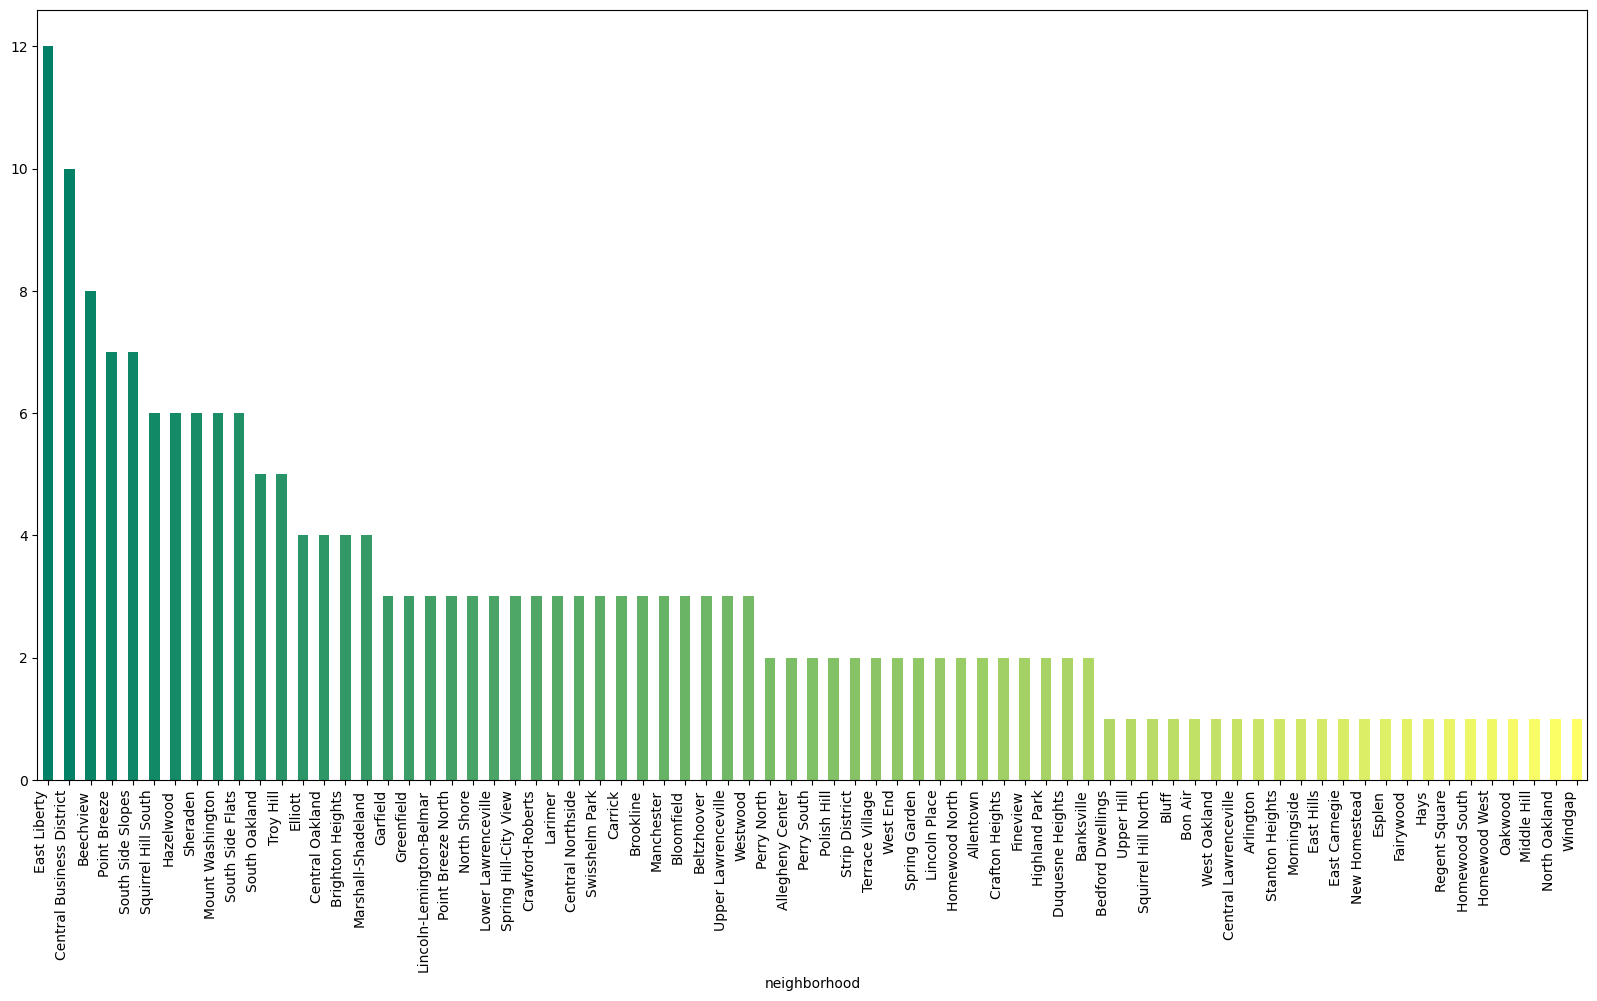

In [96]:
num_parks_sorted = num_parks.sort_values(ascending=False) #Sort the data
colors = plt.cm.summer(np.linspace(0, 1, len(num_parks_sorted))) #Adds the nice colors
plt.figure(figsize=(20, 10)) #Create a figure and axes
ax = plt.gca() #Create a bar chart with sorted data
num_parks_sorted.plot(kind='bar', color=colors, ax=ax)
ax.set_xticklabels(num_parks_sorted.index, ha="right") #Set the x-axis labels as neighborhood names
plt.show() #show our beautiful graph

#### <span style="color:green;">This makes it clear how many parks each neighborhood has, now let's use a map to see the distribution geographically.</span>


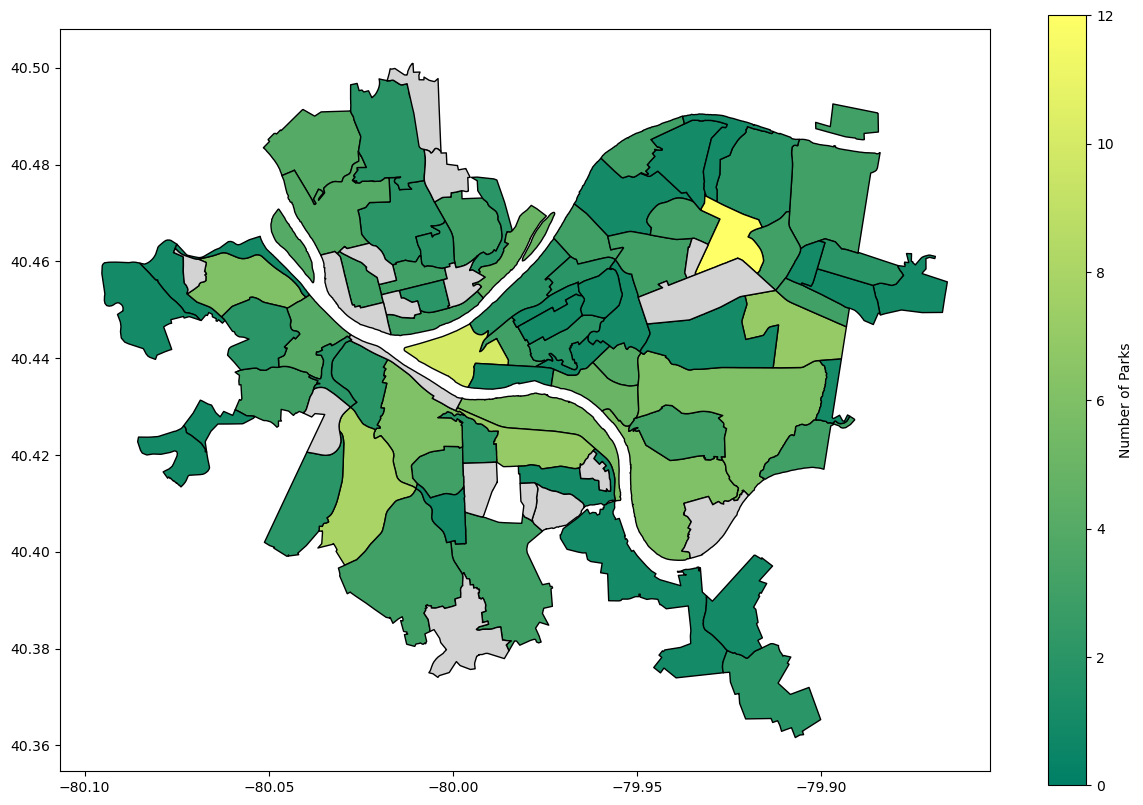

In [98]:
num_parks = num_parks.reset_index()
num_parks.columns = ["neighborhood", "parks_count"]
neighborhoods = geopandas.read_file("Neighborhoods_.shp")
parks_map = neighborhoods.merge(num_parks, how="left", left_on="hood", right_on="neighborhood")
parks_map.plot(column = 'parks_count', #set the data to be used for coloring
              cmap = 'summer', # hose summer as the color palette
              edgecolor = 'black', #outlines districts in black
              legend = True, # show the legend
              legend_kwds = {'label': 'Number of Parks'}, #label the legend
              figsize = (15, 10), #set the size
              missing_kwds = {'color': 'lightgrey'}, #set districts w out data as grey
              vmin = 0)
plt.show()

#### <span style="color:green;">This shows visually where the most parks are, and interestingly just because a reigon is bigger does not mean it will have more parks than a smaller one</span>

#### <span style="color:green;">In terms of parks, the top neighborhoods are **East Liberty, Central Business District, and Beechview**</span>

## **Second Metric:** <span style="color:dodgerblue;">**POOLS**</span>

#### <span style="color:dodgerblue;">Dataset: </span>https://data.wprdc.org/dataset/city-pools

#### <span style="color:dodgerblue;">Pools allow you to exercise while staying cool in the hot summer months. Swimming is also one of the best exercises for young and old people alike, meaning neighborhoods with pools can support your health even after you're old.</span>

#### <span style="color:dodgerblue;">Let's see a list of which neighborhoods have pools/and how many they have.</span>

In [105]:
pool = pd.read_csv("pool.csv", parse_dates=True)
num_pools = pool.groupby("neighborhood").size().reset_index(name="pool_count")
num_pools = num_pools.sort_values(by="pool_count", ascending=False)
num_pools

,neighborhood,pool_count
21,South Side Flats,2
12,Highland Park,2
0,Allegheny Center,1
14,Lincoln Place,1
24,Troy Hill,1
23,Squirrel Hill South,1
22,South Side Slopes,1
20,Sheraden,1
19,Shadyside,1
18,Polish Hill,1


#### <span style="color:dodgerblue;">This shows us that only 25 neighborhoods in all of Pittsburgh have some sort of pool. This means a bar chart would probably not be the best choice to show the data. Let's make a pie chart instead to show the distribution of pools in Pittsburgh</span>

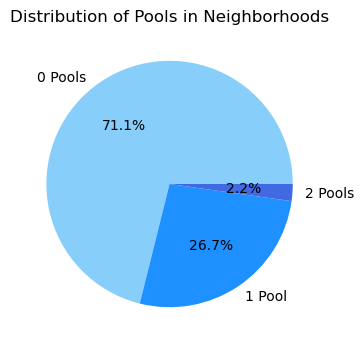

In [107]:
all_neighborhoods = pd.read_csv('Neighborhoods.csv')
neighborhoods_with_pools = num_pools['neighborhood'] #Find neighborhoods with pools
total_neighborhoods = len(all_neighborhoods) #Get the total number of neighborhoods from all_neighborhoods, this is important for counting 0 pools

neighborhoods_without_pools = all_neighborhoods[~all_neighborhoods['hood'].isin(neighborhoods_with_pools)]#count neighborhoods with 0 pools
count_1_pool = (num_pools['pool_count'] == 1).sum() #same for 1 pool
count_2_pools = (num_pools['pool_count'] == 2).sum() #same for 2 pools
count_0_pools = len(neighborhoods_without_pools)# calculate the number of neighborhoods with 0 pools
pool_counts = [count_0_pools, count_1_pool, count_2_pools] #organize data for barchart
labels = ['0 Pools', '1 Pool', '2 Pools']

plt.figure(figsize=(8, 4)) #Plot the pie chart
plt.pie(pool_counts, labels=labels, autopct='%1.1f%%', colors=['lightskyblue', 'dodgerblue', 'royalblue']) #make it look pretty
plt.title('Distribution of Pools in Neighborhoods') #title
plt.ylabel('') #this looks nicer than if it had a y-axis
plt.show() #show our beautiful pie

#### <span style="color:dodgerblue;">This shows that the majority of neighborhoods do not have a single pool, and of those that do, only a small fraction have more than one.</span>

#### <span style="color:dodgerblue;">In terms of pools, the top neighborhoods are **South Side Flats and Highland Park** as they both have 2 pools.</span>

## **Third Metric:** <span style="color:hotpink;">**COURTS & RINKS**</span>

#### <span style="color:hotpink;">Dataset: </span>https://data.wprdc.org/dataset/city-of-pittsburgh-courts

#### <span style="color:hotpink;">Of course, bad weather in Pittsburgh is bound to happen. Rinks are where you can do winter activities, such as ice hockey or ice skating, during the winter months. However, courts are just as important to consider aswell as certain sports cannot be played in a park's grass field or pool.</span>

#### <span style="color:hotpink;">Let's create a list of which neighborhoods have the most courts and rinks</span>

In [114]:
courts = pd.read_csv("courts.csv", parse_dates=True)
num_courts = courts.groupby("neighborhood").size() #create the list of number of courts in each neighborhood
num_courts_sorted=num_courts.sort_values(ascending=False) #sort greatest to least
num_courts_sorted

neighborhood
Squirrel Hill South    26
Highland Park          20
Hazelwood              10
Beltzhoover             9
Brookline               9
                       ..
Perry South             1
Bon Air                 1
Upper Hill              1
Allentown               1
Middle Hill             1
Length: 63, dtype: int64

#### <span style="color:hotpink;">The top two parks have double the amount of other neighborhoods! Let's see what this looks like in a bar chart</span>

In [116]:
colors = [(1, 0.75, 0.8), (0.6, 0.8, 1)]  #This is just to add the color
custom_cmap = LinearSegmentedColormap.from_list("baby_pink_to_blue", colors, N=len(num_courts_sorted))
colors = custom_cmap(np.linspace(0, 1, len(num_courts_sorted)))

In [117]:
num_courts = num_courts.reset_index() #this prevents errors when making the barchart
num_courts.columns = ["neighborhood", "court_count"]

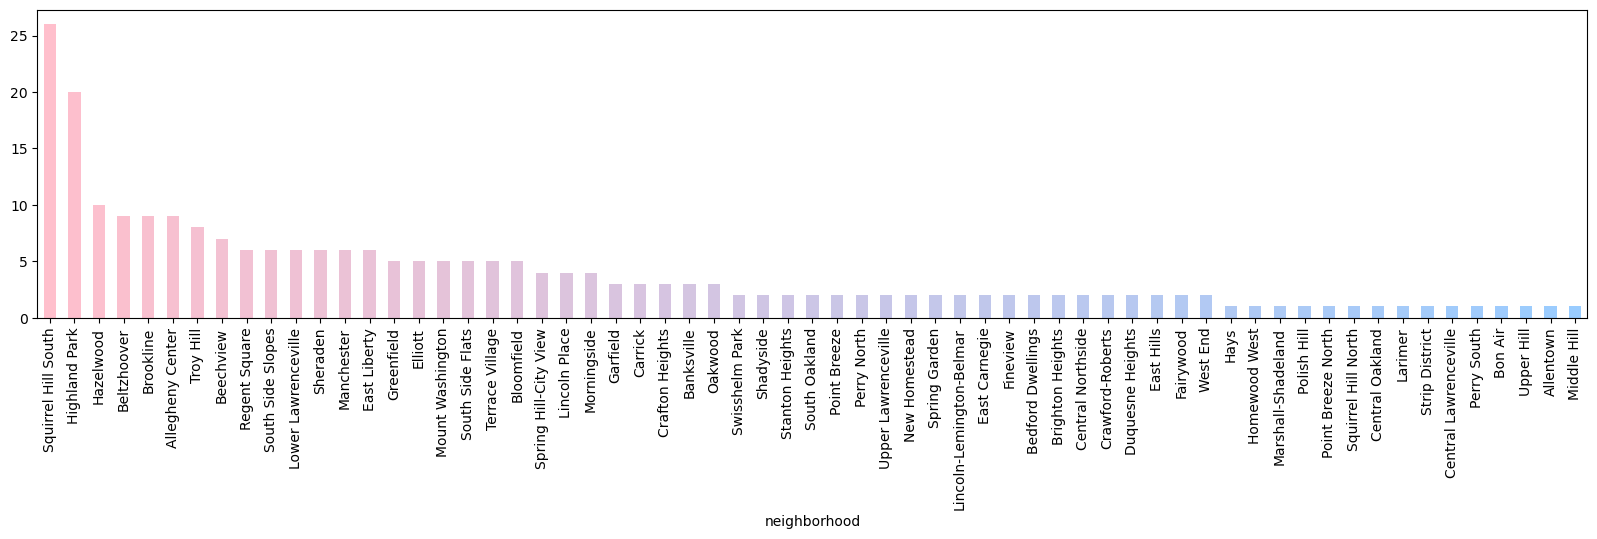

In [118]:
colors = custom_cmap(np.linspace(0, 1, len(num_courts_sorted))) #gives it the pretty color!
# Plotting the bar chart
plt.figure(figsize=(20, 4)) #how far apart each bar is
ax = plt.gca()
num_courts_sorted.plot(kind='bar', stacked=True, color=colors, x='neighborhood', y='court_count', ax=ax) #plots the map
plt.show() #shows the chart

#### <span style="color:hotpink;">We can see that there is a harsh drop off and then the numbers steadily decrease. Let's see how this looks on a map.</span>

<Axes: >

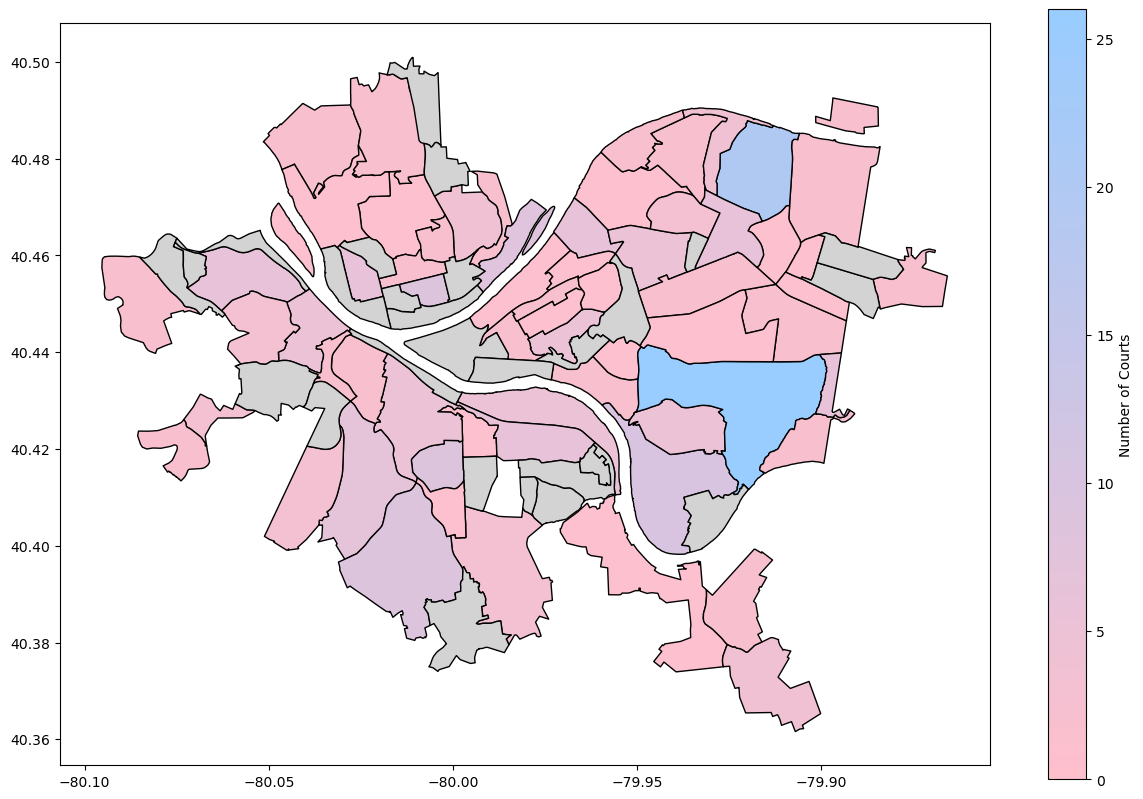

In [120]:
neighborhoods = geopandas.read_file("Neighborhoods_.shp")
courts_map = neighborhoods.merge(num_courts, how="left", left_on="hood", right_on="neighborhood")
courts_map.plot(column='court_count', # set the data to be used for coloring
               cmap=custom_cmap,         #use custom color pallette
               edgecolor="black",        # outline the districts in black
               legend=True,              #show the legend
               legend_kwds={'label': "Number of Courts"}, # label the legend
               figsize=(15, 10),         #set the size
               missing_kwds={"color": "lightgrey"}, #set disctricts with no data to gray
               vmin=0)

#### <span style="color:hotpink;">The map shows there is a decent distribution of courts and rinks among Pittsburgh and the amount stays consistently around the 5-10 mark</span>

#### <span style="color:hotpink;">In terms of courts and rinks, the top neighborhoods are **Squirrel Hill South and Highland Park**</span>

## **Best Neighborhood**

#### Now let's combine every dataset into one graph so we can see which one is the best based on our metrics.

## **Conclusion**

In [126]:
#reset everything to make a new dataset
num_parks = parks.groupby("neighborhood").size().reset_index(name="park_count")
num_courts = courts.groupby("neighborhood").size().reset_index(name="court_count")
num_pools = pool.groupby("neighborhood").size().reset_index(name="pool_count")

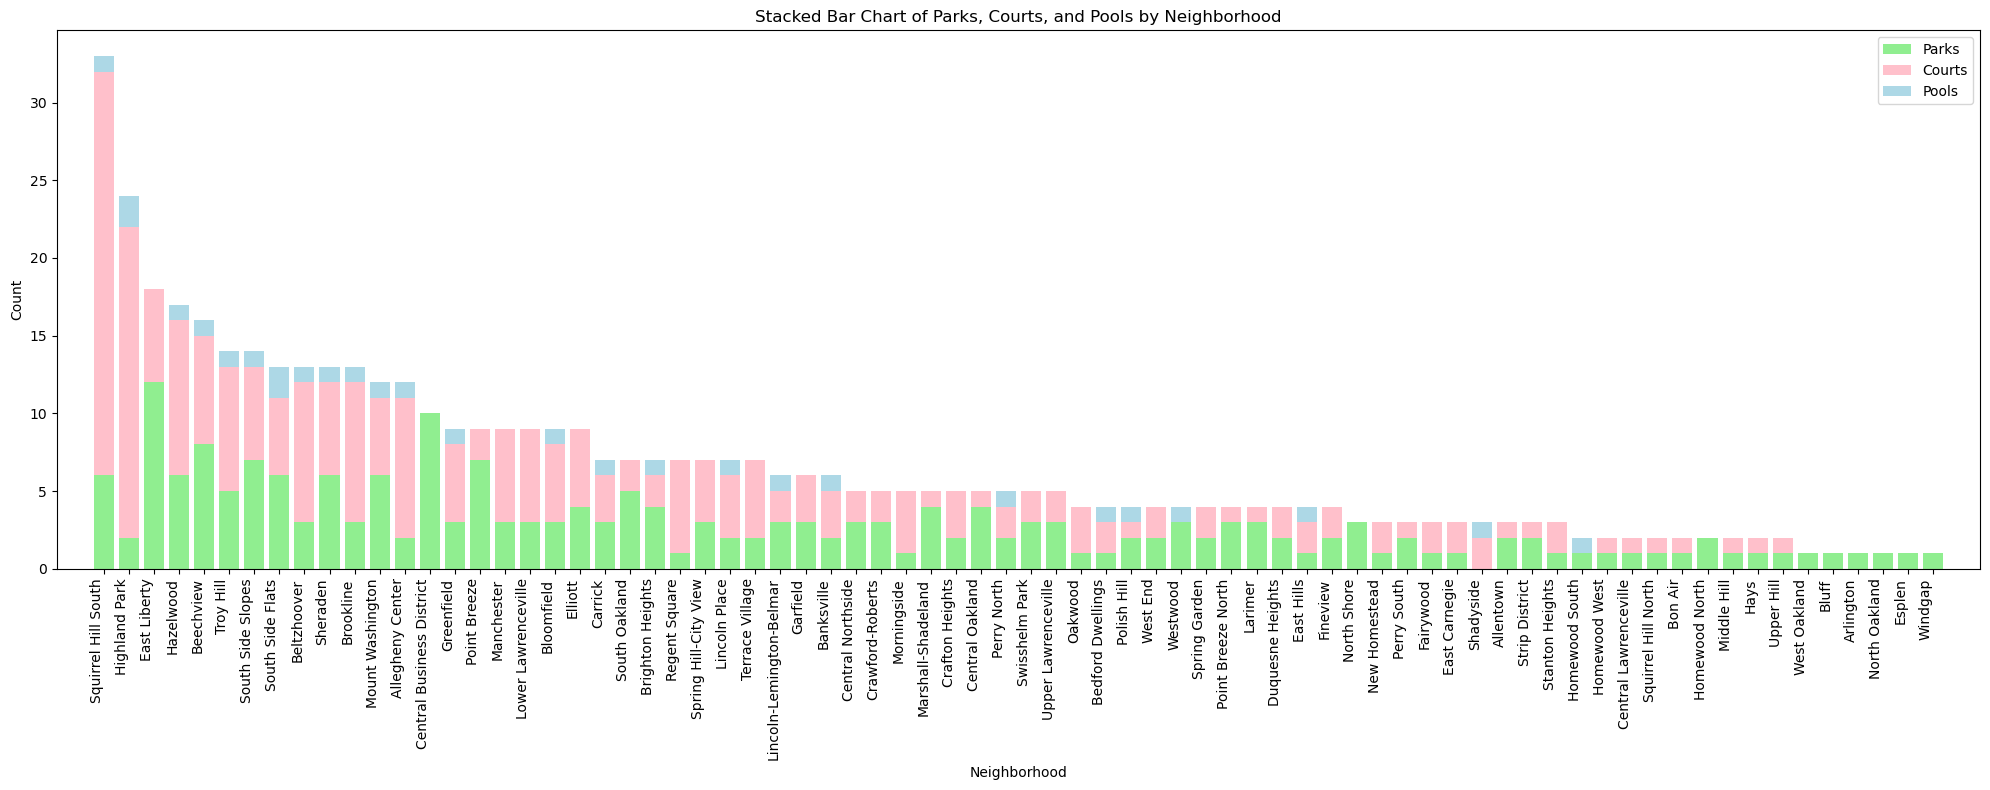

In [127]:
#merge the data
merged_data = pd.merge(num_parks, num_courts, on="neighborhood", how="outer")
merged_data = pd.merge(merged_data, num_pools, on="neighborhood", how="outer")

#replace NaN with 0 for neighborhoods that are missing counts
merged_data.fillna(0, inplace=True)

#sort by the sum of all counts
merged_data["total"] = merged_data["park_count"] + merged_data["court_count"] + merged_data["pool_count"]
merged_data = merged_data.sort_values(by="total", ascending=False)

#plot a stacked bar chart
plt.figure(figsize=(20, 8))  # Adjust figure size for better spacing

neighborhoods = merged_data["neighborhood"]
park_counts = merged_data["park_count"]
court_counts = merged_data["court_count"]
pool_counts = merged_data["pool_count"]

#create x positions with spacing
x_positions = np.arange(len(neighborhoods))  # Numeric positions for neighborhoods
bar_width = 0.8  # Width of bars (reduce for spacing between bars)

#plot bars with spacing
plt.bar(x_positions, park_counts, width=bar_width, label='Parks', color='lightgreen')
plt.bar(x_positions, court_counts, width=bar_width, bottom=park_counts, label='Courts', color='pink')
plt.bar(x_positions, pool_counts, width=bar_width, bottom=park_counts + court_counts, label='Pools', color='lightblue')

#customize chart
plt.xlabel("Neighborhood")
plt.ylabel("Count")
plt.title("Stacked Bar Chart of Parks, Courts, and Pools by Neighborhood")

#spread out x-axis labels and adjust ticks to match bar positions
plt.xticks(x_positions, neighborhoods, rotation=90, ha='right', fontsize=10)
plt.gca().margins(x=0.02)  # Add slight margins to prevent crowding

#add legend and adjust layout
plt.legend(loc="upper right")
plt.tight_layout()  # Ensure everything fits in the figure

#show the plot
plt.show()

#### This shows that the neighborhood that wins is...

# **Squirrel Hill South!**

**Alyssa:** This is unsurprising as Squirrel Hill is typically regarded as a safe and outdoorsy neighborhood. Looking at the data, I believe that considering the amount of parks, courts, and rinks are a good metric to determine the best neighborhood to do outdoor activity. However, counting the amount of pools seemed to be somewhat insignificant. Despite this, I still think it pairs nicely with our other metrics. I was also shocked to see South Side Flats rank somewhat highly as I do not consider it to be an outdoorsy neighborhood. Overall, we still think the data was helpful in determining the best neighborhood in Pittsburgh and I agree personally with the result.

**Ruby:** Speaking as someone who's always lived around Pittsburgh, I'm not surprised that Squirrel Hill won. I have only ever heard great things about the neighborhood and it is my personal favorite. Our data confirmed the way I had already felt. It is the best neighborhood for outdoor activities, but there are others that are good too.

Honorable mentions would be **East Liberty** for having a large amount of both parks and courts, and also **Highland Park** for having a respectable amount of all 3 metrics. However, Squirrel Hill South has a crazy amount of courts and rinks which allows it to easily take first place.